<a href="https://colab.research.google.com/github/Devaphoenix/Insurance-claim/blob/main/Zirconia%2B_281_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
df=pd.read_csv('cubic_zirconia.csv')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [ ]:
df1=df.drop('Unnamed: 0',axis=1)

In [ ]:
df1.isnull().sum()/df1.isnull().sum().sum()*100

carat        0.0
cut          0.0
color        0.0
clarity      0.0
depth      100.0
table        0.0
x            0.0
y            0.0
z            0.0
price        0.0
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df1.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [ ]:
cols=df1.isnull().sum()[df1.isnull().sum()>0].index

In [ ]:
objects=df1[cols].select_dtypes(include=['object','category']).columns
non_objects=df1[cols].select_dtypes(exclude=['object','category']).columns

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df1[non_objects].iloc[:,:])

In [ ]:
df1[non_objects]=imputer.transform(df1[non_objects])

In [ ]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
df1.price.value_counts(normalize=True)

544      0.002744
625      0.002485
776      0.002447
828      0.002447
605      0.002373
           ...   
7643     0.000037
3561     0.000037
7659     0.000037
17904    0.000037
8284     0.000037
Name: price, Length: 8742, dtype: float64

In [ ]:
from pylab import rcParams

In [ ]:
rcParams['figure.figsize'] = 15,8

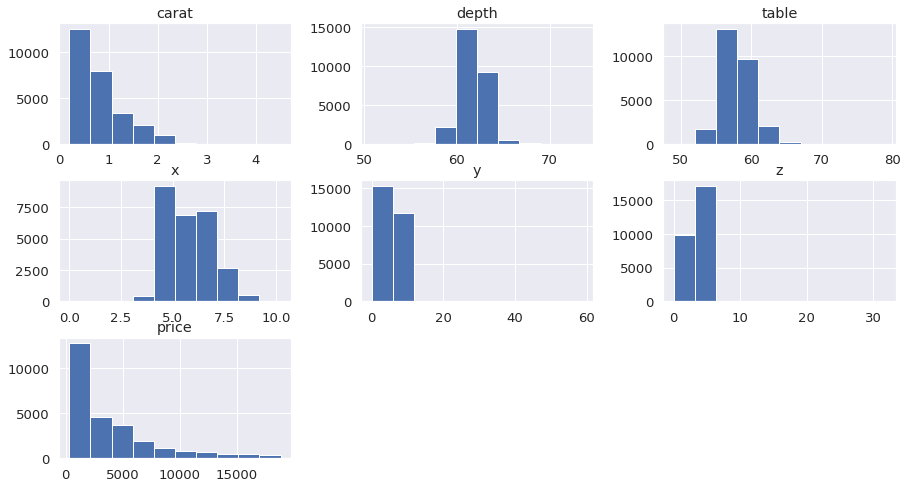

In [ ]:
df1[['carat','cut','color','clarity','depth','table','x','y','z','price']].hist();

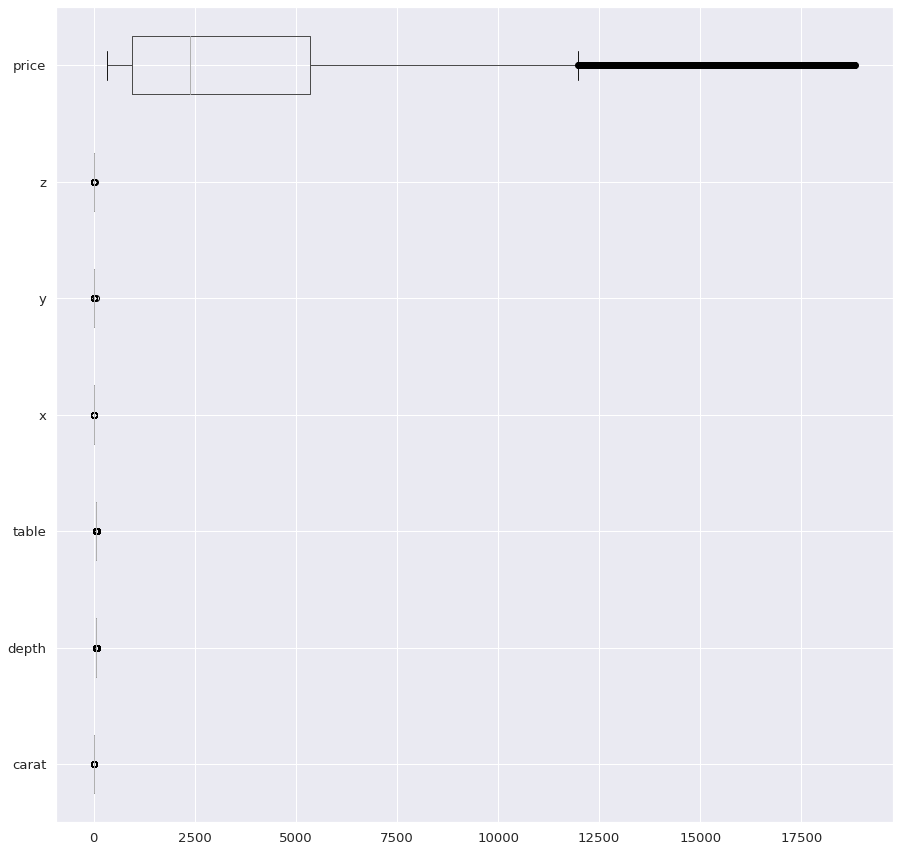

In [ ]:
plt.figure(figsize=(15,15))
df1[['carat', 'depth', 'table', 'x', 'y','z','price']].boxplot(vert=0)

In [ ]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for feature in df[['carat', 'depth', 'table', 'x', 'y','z','price']]: 
    lr,ur=treat_outlier(df1[feature])
    df1[feature]=np.where(df1[feature]>ur,ur,df1[feature])
    df1[feature]=np.where(df1[feature]<lr,lr,df1[feature])

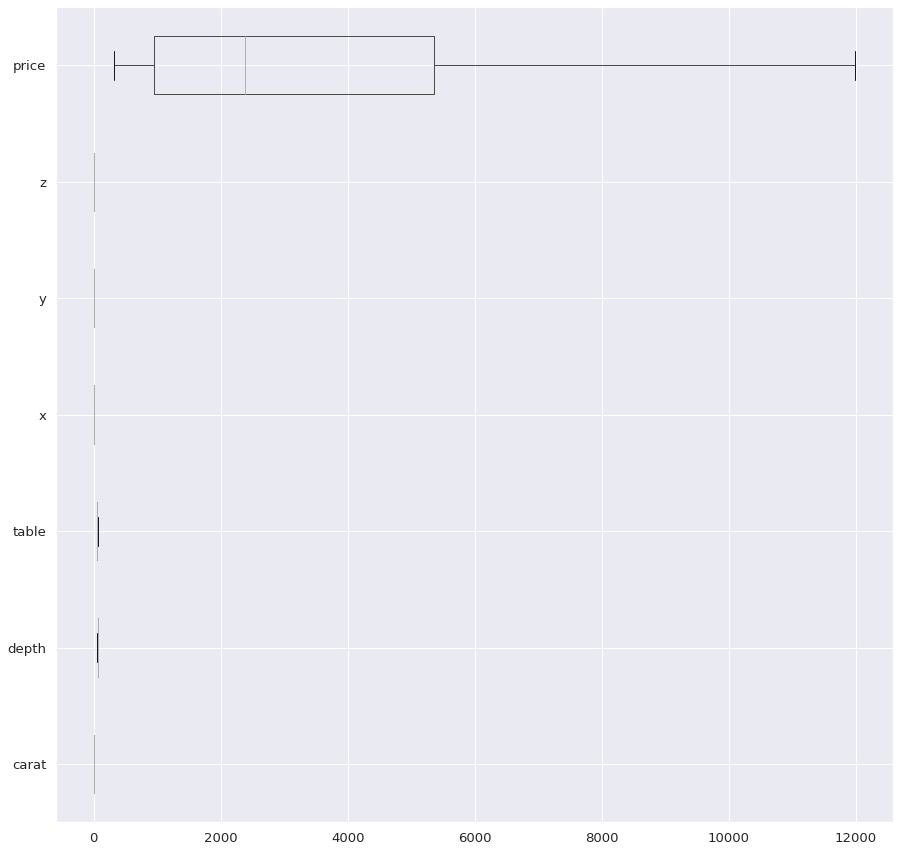

In [ ]:
plt.figure(figsize=(15,15))
df1[['carat', 'depth', 'table', 'x', 'y','z','price']].boxplot(vert=0)

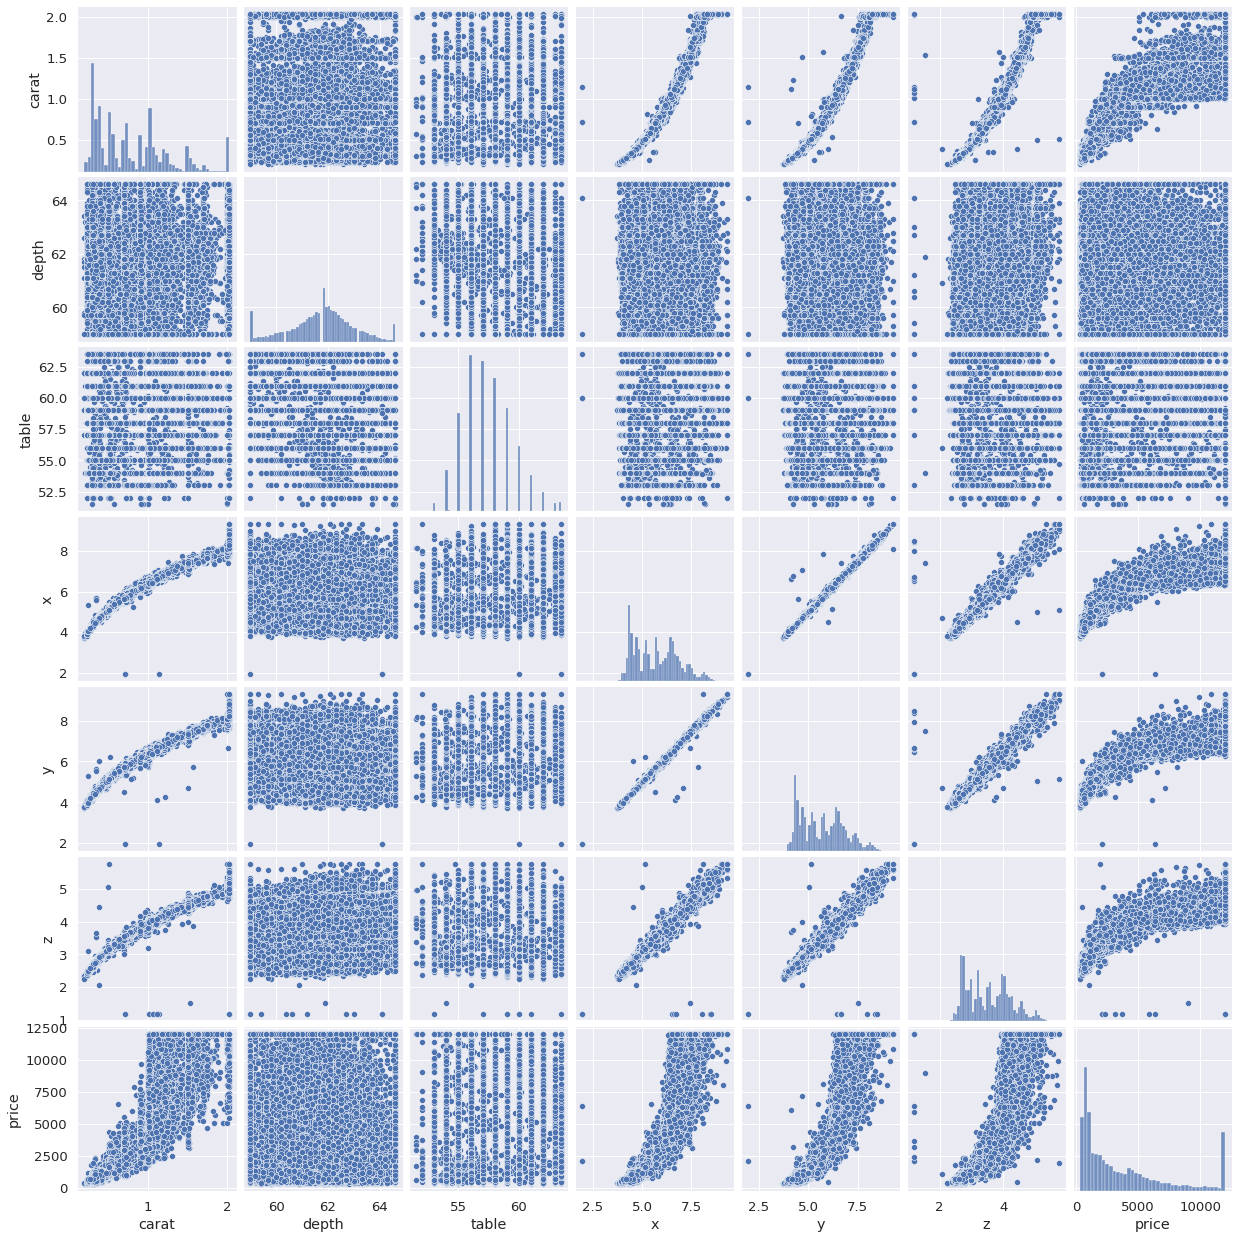

In [ ]:
sns.pairplot(df1.iloc[:])

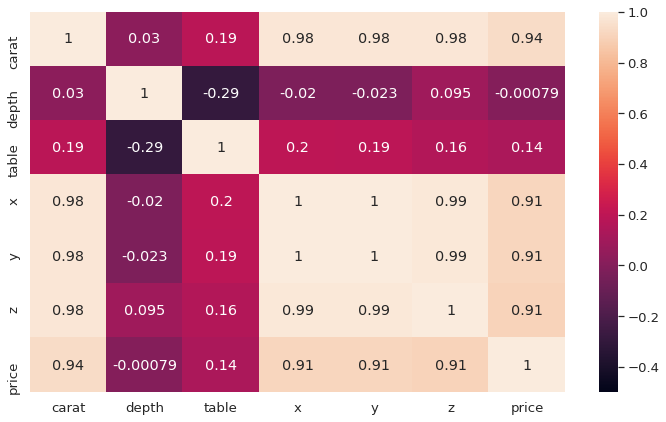

In [ ]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(df1.iloc[:].corr(), annot=True,vmin=-0.5,vmax=1)

In [ ]:
df1.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [ ]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64




In [ ]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

In [ ]:
x=df1.drop(['price','x','y','z'],axis=1) 
y=df1.price

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regression_model.score(x_train, y_train)

0.9079643693346607

In [ ]:
# R square on testing data
regression_model.score(x_test, y_test)

0.9058263258089326

In [ ]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1056.1530690748039

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1057.35405530065

In [ ]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,price
17077,0.59,2,1,5,61.5,56.0,1789.0
6625,0.84,0,3,2,59.0,63.5,2782.0
26566,1.40,3,5,7,62.0,58.0,8467.0
3649,0.30,2,3,7,61.4,57.0,665.0
11520,0.33,3,4,1,60.3,59.0,1114.0


In [ ]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')

In [ ]:
expr= 'price ~ carat + cut + color  + clarity + depth + table'

In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    6415.943606
carat        7547.574686
cut            57.443287
color        -220.680400
clarity       259.876457
depth         -79.369640
table         -75.404999
dtype: float64

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 3.102e+04
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:30:18   Log-Likelihood:            -1.5821e+05
No. Observations:               18876   AIC:                         3.164e+05
Df Residuals:                   18869   BIC:                         3.165e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6415.9436    522.742     12.274      0.0

In [ ]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [ ]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1056.1530690748004

In [ ]:
np.sqrt(lm1.mse_resid) #another way

1056.3489561367144

In [ ]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

In [ ]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(6415.94) * Intercept + (7547.57) * carat + (57.44) * cut + (-220.68) * color + (259.88) * clarity + (-79.37) * depth + (-75.4) * table + 

In [ ]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [ ]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        1056.153069  1057.354055        0.907964    0.905826
Decision Tree Regressor    46.544097   557.025517        0.999821    0.973864
Random Forest Regressor   162.708063   421.914027        0.997816    0.985005
ANN Regressor             497.535893   507.347272        0.979576    0.978318
